In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import feather
from bracket_functions import save_brackets
%matplotlib inline

In [5]:
df_scores = feather.read_dataframe('scores_2018.feather')

In [8]:
df_scores.head()

,index,Name,Score,16 Seeds,16 Total,UMBC,Potential Score,32,16,8,4,2,1
0,0,bracket860996,590,0,0,0,590,21,3,2,1,1,0
1,1,bracket35002,510,0,0,0,510,21,7,2,1,0,0
2,2,bracket860991,280,0,0,0,280,20,4,0,0,0,0
3,3,bracket687984,340,1,10,0,340,20,5,1,0,0,0
4,4,bracket864860,1070,1,10,0,1070,21,9,3,1,1,1


## Print Summaries

In [ ]:
print df_scores[df_scores['score']==df_scores['score'].max()]
print df_scores[df_scores['16_seeds']==df_scores['16_seeds'].max()]
print df_scores[df_scores['16_total']==df_scores['16_total'].max()]
print df_scores[df_scores['umbc']==df_scores['umbc'].max()]
# print df_scores[df_scores['Potential Score']==df_scores['Potential Score'].max()]
print df_scores[df_scores['32']==df_scores['32'].max()]
# print df_scores[df_scores['16']==df_scores['16'].max()]
# print df_scores[df_scores['8']==df_scores['8'].max()]
# print df_scores[df_scores['4']==df_scores['4'].max()]
# print sum(df_scores['2']==df_scores['2'].max())
# print sum(df_scores['1']==df_scores['1'].max())
print df_scores.shape

In [ ]:
max_scores = df_scores[df_scores['Score']==df_scores['Score'].max()]
bracket_names_top = max_scores['Name'].tolist()
save_brackets('top', bracket_names_top)

sixteen_seeds = df_scores[df_scores['16 Total']==df_scores['16 Total'].max()]
bracket_names_16 = sixteen_seeds['Name'].tolist()
save_brackets('16_seed', bracket_names_16)

first_round = df_scores[df_scores['32']==df_scores['32'].max()]
bracket_names_first = first_round['Name'].tolist()
save_brackets('first_round', bracket_names_first)

## ESPN Brackets

In [11]:
espn_brackets = feather.read_dataframe('espn_brackets_2018.feather')
espn_brackets = espn_brackets[espn_brackets['p']!=0]

## Plots

### Full histogram

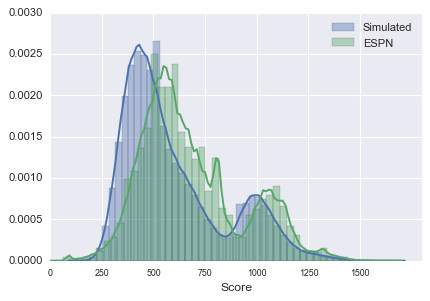

In [12]:
plt.clf()
sns.distplot(my_brackets.Score)
sns.distplot(espn_brackets.p)
plt.xticks(range(0, 1670, 250), fontsize=8)
plt.xlim(0, 1800)
plt.legend(["Simulated", "ESPN"])
plt.xlabel('Score')
plt.show()
# plt.savefig('full_histogram.jpg')

### Zoomed In

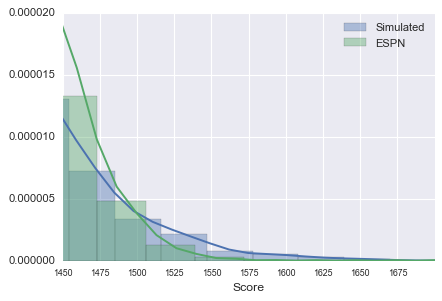

In [13]:
plt.clf()
sns.distplot(my_brackets.Score)
sns.distplot(espn_brackets.p)
plt.xticks(range(0, 1700, 25), fontsize=8)
plt.legend(["Simulated", "ESPN"])
plt.xlim(1450, 1700)
plt.ylim(0, 0.00002)
plt.xlabel('Score')
plt.show()
# plt.savefig('top_histogram.jpg')

### Full CDF

In [ ]:
plt.clf()
sns.distplot(my_brackets.Score, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
sns.distplot(espn_brackets.p, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
plt.xticks(range(0, 1670, 250), fontsize=8)
plt.ylim(0, 1)
plt.xlim(0, 1800)
plt.xlabel('Score')
plt.legend(["Simulated", "ESPN"], loc=2)
plt.show()
# plt.savefig('full_cdf.jpg')